In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
from PIL import Image


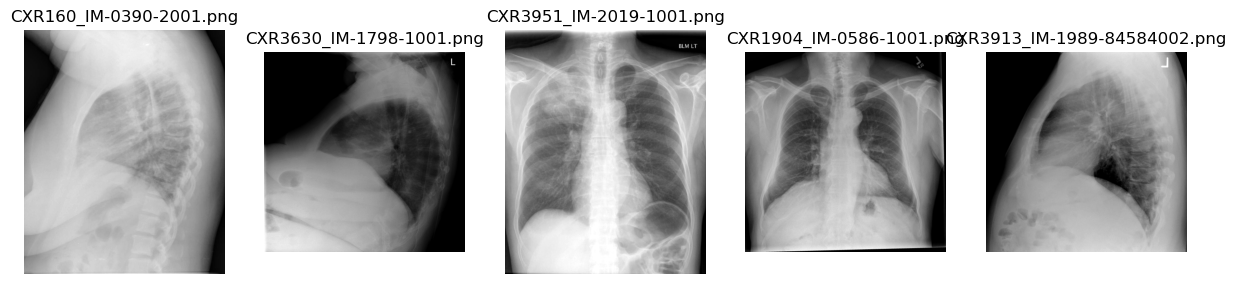

In [2]:
import os  # Import the os module for file path operations
import matplotlib.pyplot as plt
import random
import cv2

# Define the path to the directory containing the images
image_dir = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"

# Load some random images from the directory
sample_images = random.sample(os.listdir(image_dir), 5)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, img_file in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_file)  # Construct the full path to the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    if img is None:  # Check if the image was loaded successfully
        print(f"Warning: Unable to load image {img_file}. Skipping.")
        continue
    axes[i].imshow(img, cmap="gray")  # Display the image in grayscale
    axes[i].axis("off")  # Hide the axes
    axes[i].set_title(img_file)  # Set the title of the subplot to the image file name
plt.show()  # Show the plot

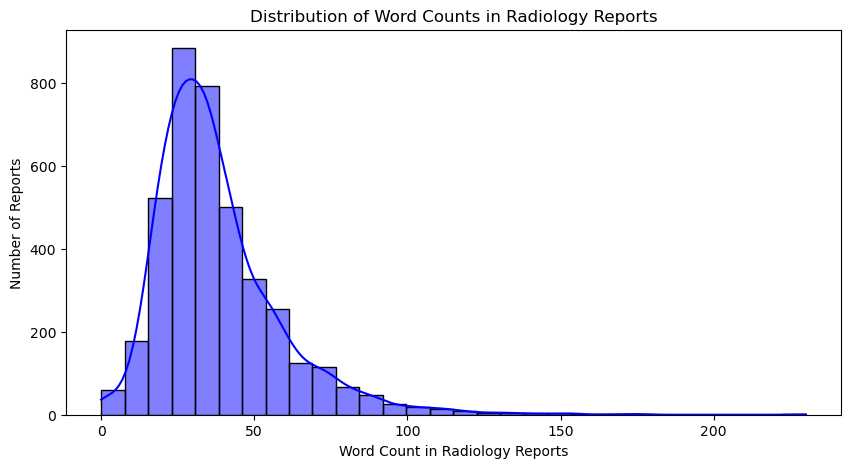

In [4]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns

# Define path to reports
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"  # Update with your path

def extract_text_length(xml_folder):
    """Extract and count words in Findings/Impression from XML reports."""
    word_counts = []

    for xml_file in os.listdir(xml_folder):
        if not xml_file.endswith(".xml"):  # Skip non-XML files
            continue
        
        xml_path = os.path.join(xml_folder, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            
            findings, impression = "", ""
            for child in root.findall(".//AbstractText"):
                label = child.get("Label", "").lower()
                if "findings" in label:
                    findings = child.text.strip() if child.text else ""
                elif "impression" in label:
                    impression = child.text.strip() if child.text else ""

            total_text = findings + " " + impression  # Combine both sections
            word_counts.append(len(total_text.split()))  # Count words

        except Exception as e:
            print(f"Error reading {xml_file}: {e}")

    return word_counts

# Get word count distribution
word_counts = extract_text_length(xml_folder)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(word_counts, bins=30, kde=True, color="blue")
plt.xlabel("Word Count in Radiology Reports")
plt.ylabel("Number of Reports")
plt.title("Distribution of Word Counts in Radiology Reports")
plt.show()


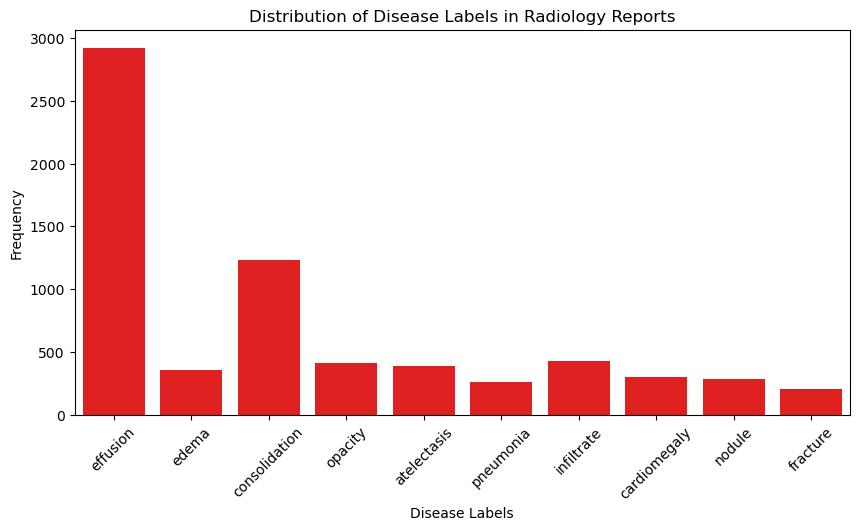

In [5]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the path to the reports folder
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"  # Update with your path

# Define common disease-related keywords
disease_keywords = [
    "pneumonia", "cardiomegaly", "effusion", "fracture", "opacity", 
    "edema", "atelectasis", "nodule", "consolidation", "infiltrate"
]

def extract_disease_labels(xml_folder):
    """Extract disease labels from radiology reports based on keyword matching."""
    disease_counts = Counter()

    for xml_file in os.listdir(xml_folder):
        if not xml_file.endswith(".xml"):
            continue  # Skip non-XML files

        xml_path = os.path.join(xml_folder, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            
            findings, impression = "", ""
            for child in root.findall(".//AbstractText"):
                label = child.get("Label", "").lower()
                if "findings" in label:
                    findings = child.text.strip() if child.text else ""
                elif "impression" in label:
                    impression = child.text.strip() if child.text else ""

            report_text = findings + " " + impression  # Combine text sections
            for disease in disease_keywords:
                if disease in report_text.lower():
                    disease_counts[disease] += 1  # Count occurrence

        except Exception as e:
            print(f"Error reading {xml_file}: {e}")

    return disease_counts

# Extract disease label counts
disease_counts = extract_disease_labels(xml_folder)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(disease_counts.keys()), y=list(disease_counts.values()), color="red")
plt.xlabel("Disease Labels")
plt.ylabel("Frequency")
plt.title("Distribution of Disease Labels in Radiology Reports")
plt.xticks(rotation=45)
plt.show()


In [9]:
import collections

# Count duplicate reports linked to the same image
report_to_image = collections.defaultdict(list)

for xml_file in os.listdir(xml_folder):
    if xml_file.endswith('.xml'):
        base_name = xml_file.split('.')[0]
        report_to_image[base_name].append(xml_file)

# Find images with multiple reports
multiple_reports = {img: reports for img, reports in report_to_image.items() if len(reports) > 1}

print(f"Total images with multiple reports: {len(multiple_reports)}")

if multiple_reports:
    print("⚠️ Some images are linked to multiple reports! Consider merging them.")


Total images with multiple reports: 0
